In [352]:
import sys
import pickle
sys.path.append("../tools/")
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

payment_data = ['salary',
                'bonus',
                'long_term_incentive',
                'deferred_income',
                'deferral_payments',
                'loan_advances',
                'other',
                'expenses',                
                'director_fees', 
                'total_payments']

stock_data = ['exercised_stock_options',
              'restricted_stock',
              'restricted_stock_deferred',
              'total_stock_value']

email_data = ['to_messages',
              'from_messages',
              'from_poi_to_this_person',
              'from_this_person_to_poi',
              'shared_receipt_with_poi']

features_list = ['poi'] + payment_data + stock_data + email_data

class StrToBytes:
    def __init__(self, fileobj):
        self.fileobj = fileobj
    def read(self, size):
        return self.fileobj.read(size).encode()
    def readline(self, size=-1):
        return self.fileobj.readline(size).encode()

### Load the dictionary containing the dataset
with open("data//final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(StrToBytes(data_file))
    
df = pd.DataFrame.from_dict(data_dict, orient='index')
df = df.replace('NaN', np.nan)
df = df[features_list]

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 20 columns):
poi                          146 non-null bool
salary                       95 non-null float64
bonus                        82 non-null float64
long_term_incentive          66 non-null float64
deferred_income              49 non-null float64
deferral_payments            39 non-null float64
loan_advances                4 non-null float64
other                        93 non-null float64
expenses                     95 non-null float64
director_fees                17 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
to_messages                  86 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float

In [408]:
df.describe()
df

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_poi_ratio,from_poi_ratio,shared_poi_ratio,bonus_to_salary,bonus_to_total
BELDEN TIMOTHY N,True,213999.0,5249999.0,0.0,-2334434.0,2144013.0,0.0,210698.0,17355.0,0.0,...,7991.000000,484.000000,228.000000,108.000000,5521.000000,0.028532,0.223140,0.690902,24.532820,0.954262
BOWEN JR RAYMOND M,True,278601.0,1350000.0,974293.0,-833.0,0.0,0.0,1621.0,65907.0,0.0,...,1858.000000,27.000000,140.000000,15.000000,1593.000000,0.075350,0.555556,0.857374,4.845639,0.505696
CALGER CHRISTOPHER F,True,240189.0,1250000.0,375304.0,-262500.0,0.0,0.0,486.0,35818.0,0.0,...,2598.000000,144.000000,199.000000,25.000000,2188.000000,0.076597,0.173611,0.842186,5.204235,0.762522
CAUSEY RICHARD A,True,415189.0,1000000.0,350000.0,-235000.0,0.0,0.0,307895.0,30674.0,0.0,...,1892.000000,49.000000,58.000000,12.000000,1585.000000,0.030655,0.244898,0.837738,2.408542,0.535115
COLWELL WESLEY,True,288542.0,1200000.0,0.0,-144062.0,27610.0,0.0,101740.0,16514.0,0.0,...,1758.000000,40.000000,240.000000,11.000000,1132.000000,0.136519,0.275000,0.643914,4.158840,0.805183
DELAINEY DAVID W,True,365163.0,3000000.0,1294981.0,0.0,0.0,0.0,1661.0,86174.0,0.0,...,3093.000000,3069.000000,66.000000,609.000000,2097.000000,0.021339,0.198436,0.677983,8.215509,0.631848
FASTOW ANDREW S,True,440698.0,1300000.0,1736055.0,-1386055.0,0.0,0.0,277464.0,55921.0,0.0,...,2417.142857,300.357143,97.785714,66.714286,1783.000000,0.040455,0.222117,0.737648,2.949866,0.536285
GLISAN JR BEN F,True,274975.0,600000.0,71023.0,0.0,0.0,0.0,200308.0,125978.0,0.0,...,873.000000,16.000000,52.000000,6.000000,874.000000,0.059565,0.375000,1.001145,2.182017,0.471593
HANNON KEVIN P,True,243293.0,1500000.0,1617011.0,-3117011.0,0.0,0.0,11350.0,34039.0,0.0,...,1045.000000,32.000000,32.000000,21.000000,1035.000000,0.030622,0.656250,0.990431,6.165405,5.196029
HIRKO JOSEPH,True,0.0,0.0,0.0,0.0,10259.0,0.0,2856.0,77978.0,0.0,...,2417.142857,300.357143,97.785714,66.714286,1783.000000,0.040455,0.222117,0.737648,0.000000,0.000000


In [355]:
from sklearn.preprocessing import Imputer

# Fill in the NaN payment and stock values with zero 
df[payment_data] = df[payment_data].fillna(0)
df[stock_data] = df[stock_data].fillna(0)

# Fill in the NaN email data with the mean of column grouped by poi/ non_poi
imp = Imputer(missing_values='NaN', strategy = 'mean', axis=0)

df_poi = df[df['poi'] == True];
df_nonpoi = df[df['poi'] == False]

df_poi.ix[:, email_data] = imp.fit_transform(df_poi.ix[:, email_data]);
df_nonpoi.ix[:, email_data] = imp.fit_transform(df_nonpoi.ix[:, email_data]);
df = df_poi.append(df_nonpoi)


In [356]:
errors = (df[df[payment_data[:-1]].sum(axis='columns') != df['total_payments']])
errors

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
BELFER ROBERT,False,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,0.0,44093.0,-44093.0,2007.111111,668.763889,58.5,36.277778,1058.527778
BHATNAGAR SANJAY,False,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0,2604490.0,-2604490.0,15456290.0,0.0,523.000000,29.000000,0.0,1.000000,463.000000


In [357]:
# Retrieve the incorrect data for Belfer
belfer_financial = df.ix['BELFER ROBERT', 1:15].tolist()
# Delete the first element to shift left and add on a 0 to end as indicated in financial data
belfer_financial.pop(0)
belfer_financial.append(0)
# Reinsert corrected data
df.ix['BELFER ROBERT', 1:15] = belfer_financial

# Retrieve the incorrect data for Bhatnagar
bhatnagar_financial = df.ix['BHATNAGAR SANJAY', 1:15].tolist()
# Delete the last element to shift right and add on a 0 to beginning
bhatnagar_financial.pop(-1)
bhatnagar_financial = [0] + bhatnagar_financial
# Reinsert corrected data
df.ix['BHATNAGAR SANJAY', 1:15] = bhatnagar_financial

In [358]:
# Check for any more errors with the payment data
len(df[df[payment_data[:-1]].sum(axis='columns') != df['total_payments']])

0

In [359]:
# Check for any errors with the stock data
len(df[df[stock_data[:-1]].sum(axis='columns') != df['total_stock_value']])

0

In [360]:
# Sister company
df.drop(axis=0, labels=['TOTAL','THE TRAVEL AGENCY IN THE PARK'], inplace=True)

In [361]:
IQR = df.quantile(q=0.75) - df.quantile(q=0.25)
first_quartile = df.quantile(q=0.25)
third_quartile = df.quantile(q=0.75)
outliers = df[(df>(third_quartile + 1.5*IQR) ) | (df<(first_quartile - 1.5*IQR) )].count(axis=1)
outliers.sort_values(axis=0, ascending=False, inplace=True)
outliers.head(12)

LAY KENNETH L         15
FREVERT MARK A        12
BELDEN TIMOTHY N       9
SKILLING JEFFREY K     9
BAXTER JOHN C          8
LAVORATO JOHN J        8
DELAINEY DAVID W       7
KEAN STEVEN J          7
HAEDICKE MARK E        7
WHALLEY LAWRENCE G     7
RICE KENNETH D         6
KITCHEN LOUISE         6
dtype: int64

In [362]:
# Remove the outlier individuals
df.drop(axis=0, labels=['FREVERT MARK A', 'LAVORATO JOHN J', 'WHALLEY LAWRENCE G', 'BAXTER JOHN C'], inplace=True)

In [363]:
len(df)

140

In [364]:
# Find the number of poi and non poi now in the data
df['poi'].value_counts()

False    122
True      18
Name: poi, dtype: int64

In [365]:
df.isnull().sum().sum()

0

In [366]:
df[df==0].count().sum()

1150

In [367]:
from sklearn.preprocessing import scale
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
import tester

# Scale the dataset and send it back to a dictionary
scaled_df = df.copy()
scaled_df.ix[:,1:] = scale(scaled_df.ix[:,1:])
my_dataset = scaled_df.to_dict(orient='index')

# Create and test the Gaussian Naive Bayes Classifier
clf = GaussianNB()
tester.test_classifier(clf, my_dataset, features_list);

	Accuracy: 0.70714	Precision: 0.30909	Recall: 0.85000	F1: 0.45333	F2: 0.62963
	Total predictions:  140	True positives:   17	False positives:   38	False negatives:    3	True negatives:   82



In [368]:
# Create and test the Decision Tree Classifier
clf = DecisionTreeClassifier()
tester.test_classifier(clf, my_dataset, features_list);

	Accuracy: 0.86429	Precision: 0.52632	Recall: 0.50000	F1: 0.51282	F2: 0.50505
	Total predictions:  140	True positives:   10	False positives:    9	False negatives:   10	True negatives:  111



In [369]:
# Create and test the Support Vector Classifier
clf = SVC(kernel='linear')
tester.test_classifier(clf, my_dataset, features_list);

	Accuracy: 0.86429	Precision: 0.57143	Recall: 0.20000	F1: 0.29630	F2: 0.22989
	Total predictions:  140	True positives:    4	False positives:    3	False negatives:   16	True negatives:  117



In [370]:
# Create and test the K Means clustering classifier
clf = KMeans(n_clusters=2)
tester.test_classifier(clf, my_dataset, features_list);

	Accuracy: 0.79286	Precision: 0.09091	Recall: 0.05000	F1: 0.06452	F2: 0.05495
	Total predictions:  140	True positives:    1	False positives:   10	False negatives:   19	True negatives:  110



In [371]:
# Add the new email features to the dataframe
df['to_poi_ratio'] = df['from_poi_to_this_person'] / df['to_messages']
df['from_poi_ratio'] = df['from_this_person_to_poi'] / df['from_messages']
df['shared_poi_ratio'] = df['shared_receipt_with_poi'] / df['to_messages']

In [372]:
features_list.append('to_poi_ratio')
features_list.append('from_poi_ratio')
features_list.append('shared_poi_ratio')

In [373]:
# Create the new financial features and add to the dataframe
df['bonus_to_salary'] = df['bonus'] / df['salary']
df['bonus_to_total'] = df['bonus'] / df['total_payments'] 

In [374]:
features_list.append('bonus_to_salary')
features_list.append('bonus_to_total')  

In [375]:
# Fill any NaN financial data with a 0
df.fillna(value= 0, inplace=True)

# Create a copy of the dataframe and normalize it to zero mean and unit variance
scaled_df = df.copy()
scaled_df.ix[:,1:] = scale(scaled_df.ix[:,1:])

# Send the dataset from dataframe to dictionary for tester.py
my_dataset = scaled_df.to_dict(orient='index')

# Create the classifier, GaussianNB has no parameters to tune
clf = GaussianNB()
tester.test_classifier(clf, my_dataset, features_list);

	Accuracy: 0.72857	Precision: 0.32000	Recall: 0.80000	F1: 0.45714	F2: 0.61538
	Total predictions:  140	True positives:   16	False positives:   34	False negatives:    4	True negatives:   86



In [376]:
clf = DecisionTreeClassifier()
tester.test_classifier(clf, my_dataset, features_list);

	Accuracy: 0.91429	Precision: 0.70000	Recall: 0.70000	F1: 0.70000	F2: 0.70000
	Total predictions:  140	True positives:   14	False positives:    6	False negatives:    6	True negatives:  114



In [377]:
clf = SVC(kernel='linear')
tester.test_classifier(clf, my_dataset, features_list);

	Accuracy: 0.83571	Precision: 0.33333	Recall: 0.15000	F1: 0.20690	F2: 0.16854
	Total predictions:  140	True positives:    3	False positives:    6	False negatives:   17	True negatives:  114



In [378]:
clf = KMeans(n_clusters=2)
tester.test_classifier(clf, my_dataset, features_list);

	Accuracy: 0.77857	Precision: 0.21053	Recall: 0.20000	F1: 0.20513	F2: 0.20202
	Total predictions:  140	True positives:    4	False positives:   15	False negatives:   16	True negatives:  105



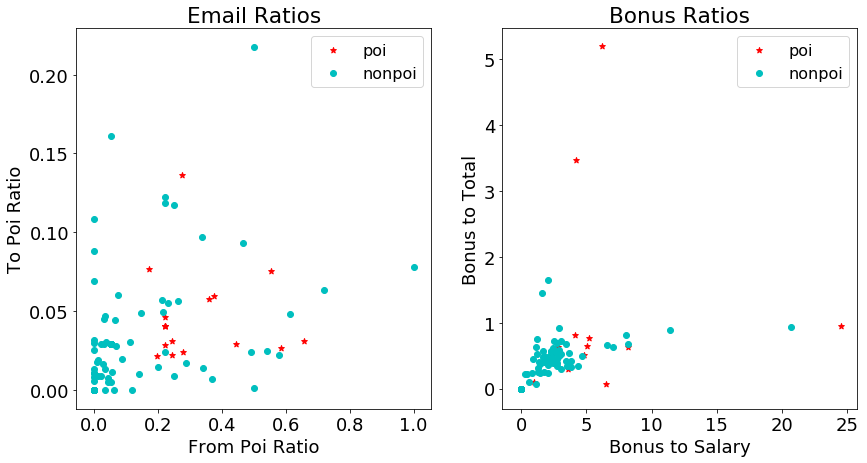

In [379]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
poi_df = df[df['poi']==True]
nonpoi_df = df[df['poi']==False]

plt.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
plt.scatter(x=poi_df['from_poi_ratio'], y = poi_df['to_poi_ratio'], color = 'red', marker='*')
plt.scatter(x=nonpoi_df['from_poi_ratio'], y = nonpoi_df['to_poi_ratio'], color = 'c')
plt.xlabel('From Poi Ratio'); plt.ylabel('To Poi Ratio'); plt.title('Email Ratios'); 
plt.legend(['poi', 'nonpoi'], prop= {'size': 16})

ax2 = fig.add_subplot(122)
plt.scatter(x=poi_df['bonus_to_salary'], y = poi_df['bonus_to_total'], color = 'red', marker='*')
plt.scatter(x=nonpoi_df['bonus_to_salary'], y = nonpoi_df['bonus_to_total'], color = 'c')
plt.xlabel('Bonus to Salary'); plt.ylabel('Bonus to Total'); plt.title('Bonus Ratios');
plt.legend(['poi', 'nonpoi'], prop= {'size': 16});

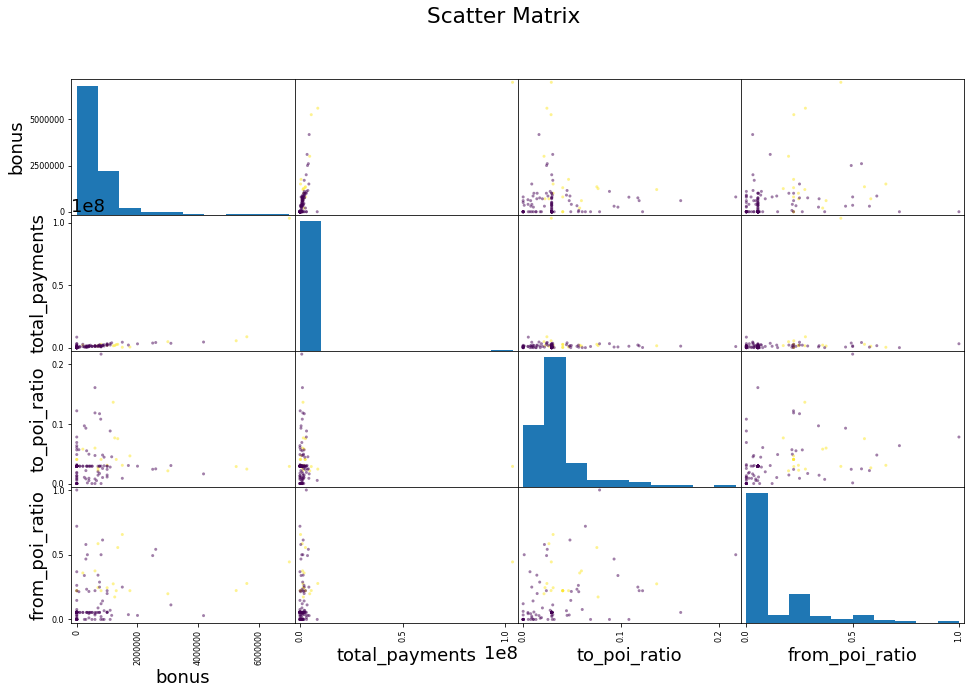

In [380]:
# Yellow is POI
from pandas.plotting import scatter_matrix
features_to_plot = ['bonus',  'total_payments', 'to_poi_ratio', 'from_poi_ratio']
scatter_matrix(df[features_to_plot], figsize=(16,10), c=df['poi']);
plt.suptitle('Scatter Matrix');

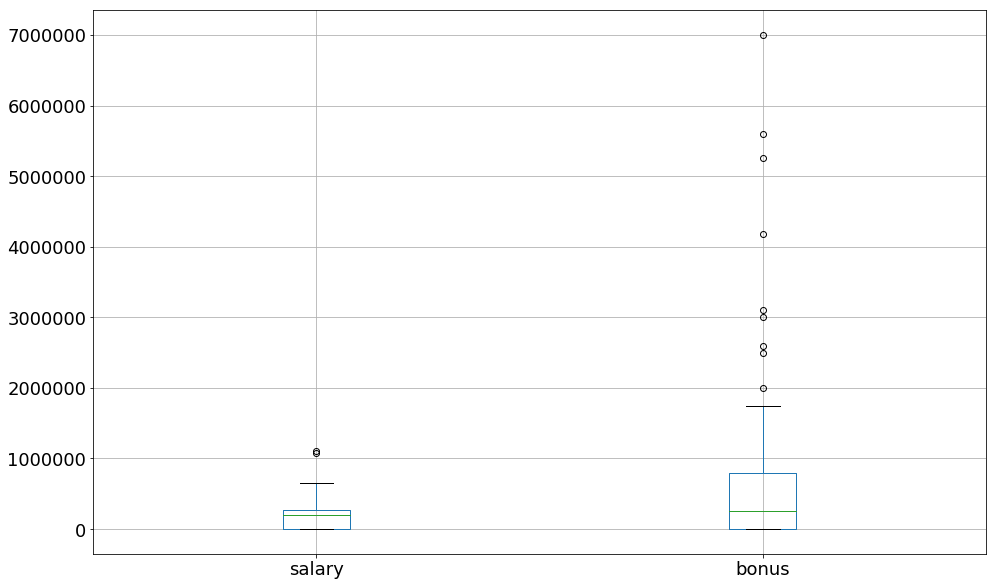

In [381]:
boxplot = df.boxplot(column=['salary', 'bonus'], figsize=(16,10))

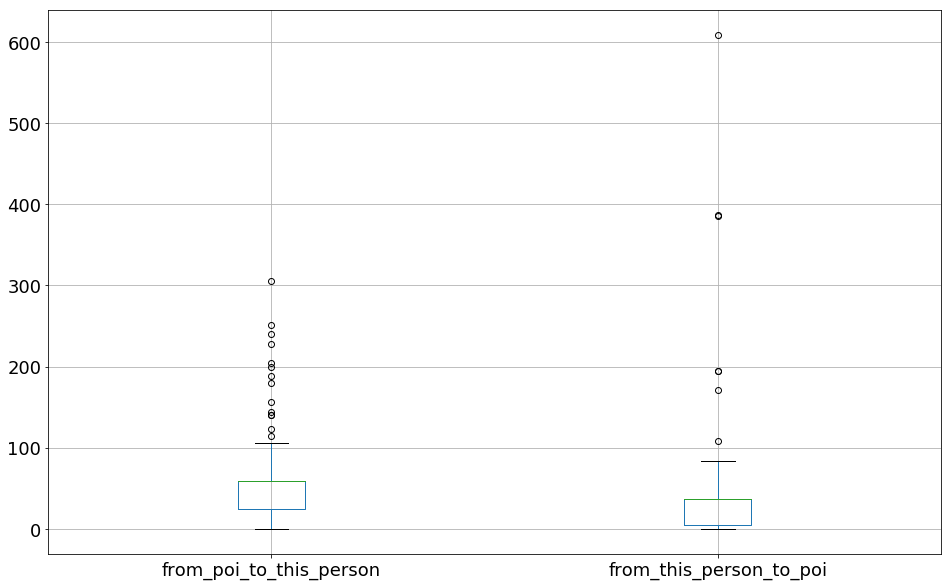

In [382]:
boxplot = df.boxplot(column=['from_poi_to_this_person', 'from_this_person_to_poi'], figsize=(16,10))

In [383]:
#SelectKBest and GridSearchCv used for feature selection
clf_tree = DecisionTreeClassifier()
clf_tree = tester.test_classifier(clf_tree, my_dataset, features_list)

	Accuracy: 0.90714	Precision: 0.68421	Recall: 0.65000	F1: 0.66667	F2: 0.65657
	Total predictions:  140	True positives:   13	False positives:    6	False negatives:    7	True negatives:  114



In [384]:
# Get the feature importances of the DecisionTree Classifier
tree_feature_importances = (clf_tree.feature_importances_)
tree_features = zip(tree_feature_importances, features_list[1:])
tree_features = sorted(tree_features, key= lambda x:x[0], reverse=True)

# Display the feature names and importance values
print('Tree Feature Importances:\n')
for i in range(10):
    print('{} : {:.4f}'.format(tree_features[i][1], tree_features[i][0]))

Tree Feature Importances:

from_poi_ratio : 0.3782
shared_receipt_with_poi : 0.2485
expenses : 0.2476
shared_poi_ratio : 0.0665
to_poi_ratio : 0.0592
salary : 0.0000
bonus : 0.0000
long_term_incentive : 0.0000
deferred_income : 0.0000
deferral_payments : 0.0000


In [385]:
clf_ada = AdaBoostClassifier()
clf_ada = tester.test_classifier(clf_ada, my_dataset, features_list);

	Accuracy: 0.94286	Precision: 0.83333	Recall: 0.75000	F1: 0.78947	F2: 0.76531
	Total predictions:  140	True positives:   15	False positives:    3	False negatives:    5	True negatives:  117



In [386]:
# Get the feature importances for the AdaBoost Classifier
ada_feature_importances = clf_ada.feature_importances_
ada_features = zip(ada_feature_importances, features_list[1:])

# Display the feature names and importance values
print('Ada Boost Feature Importances:\n')
ada_features = sorted(ada_features, key=lambda x:x[0], reverse=True)
for i in range(10):
    print('{} : {:.4f}'.format(ada_features[i][1], ada_features[i][0]))

Ada Boost Feature Importances:

shared_receipt_with_poi : 0.1200
exercised_stock_options : 0.1000
from_this_person_to_poi : 0.1000
to_poi_ratio : 0.1000
deferred_income : 0.0800
from_messages : 0.0800
from_poi_ratio : 0.0800
other : 0.0600
total_stock_value : 0.0600
shared_poi_ratio : 0.0400


In [387]:
from feature_format import featureFormat, targetFeatureSplit
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

data_dict = featureFormat(my_dataset, features_list)
labels, features = targetFeatureSplit(data_dict)

In [388]:
from sklearn.model_selection import GridSearchCV

n_features = np.arange(1, len(features_list))

# Create a pipeline with feature selection and classification
pipe = Pipeline([
    ('select_features', SelectKBest()),
    ('classify', DecisionTreeClassifier())
])

param_grid = [
    {
        'select_features__k': n_features
    }
]

# Use GridSearchCV to automate the process of finding the optimal number of features
tree_clf= GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv = 10)
tree_clf.fit(features, labels);

In [389]:
tree_clf.best_params_

{'select_features__k': 19}

In [390]:
tree_selection = SelectKBest(k=19)
tree_selection.fit_transform(features, labels)

tree_scores = tree_selection.scores_
tree_features = zip(tree_scores, features_list[1:])
tree_features = sorted(tree_features, key= lambda x:x[0], reverse=True)

print('Tree Feature F-statistics:\n')
for i in range(19):
    print('{} : {:.4f}'.format(tree_features[i][1], tree_features[i][0]))

Tree Feature F-statistics:

bonus : 36.2022
from_poi_ratio : 25.8246
salary : 25.4609
total_stock_value : 24.8372
exercised_stock_options : 24.0888
bonus_to_total : 20.8908
deferred_income : 17.0963
bonus_to_salary : 17.0251
shared_poi_ratio : 16.1635
shared_receipt_with_poi : 14.7385
from_poi_to_this_person : 12.9213
long_term_incentive : 12.7397
total_payments : 10.2104
restricted_stock : 10.0832
other : 7.9157
loan_advances : 7.0635
expenses : 5.7008
from_this_person_to_poi : 3.4099
to_poi_ratio : 2.8564


In [391]:
tree_clf = Pipeline([
    ('select_features', SelectKBest(k=19)),
    ('classify', DecisionTreeClassifier()),
])

tester.test_classifier(tree_clf, my_dataset, features_list);

	Accuracy: 0.92857	Precision: 0.75000	Recall: 0.75000	F1: 0.75000	F2: 0.75000
	Total predictions:  140	True positives:   15	False positives:    5	False negatives:    5	True negatives:  115



In [392]:
n_features = np.arange(1, len(features_list))
# Create a pipeline of feature selection and classifier
pipe = Pipeline([
    ('select_features', SelectKBest()),
    ('classify', AdaBoostClassifier())
])

param_grid = [
    {
        'select_features__k': n_features
    }
]

# Use GridSearchCV to automate the process of finding the optimal number of features
ada_clf= GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv =10)
ada_clf.fit(features, labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=10, score_func=<function f_classif at 0x0000028E418AD2F0>)), ('classify', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'select_features__k': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [393]:
ada_clf.best_params_

{'select_features__k': 21}

In [394]:
ada_clf.best_score_

0.6238095238095238

In [395]:
ada_selection = SelectKBest(k=21)
ada_selection.fit_transform(features, labels)

ada_scores = ada_selection.scores_
ada_features = zip(ada_scores, features_list[1:])
ada_features = sorted(ada_features, key= lambda x:x[0], reverse=True)

print('AdaBoost Features F-statistics:\n')
for i in range(21):
    print('{} : {:.4f}'.format(ada_features[i][1], ada_features[i][0]))

AdaBoost Features F-statistics:

bonus : 36.2022
from_poi_ratio : 25.8246
salary : 25.4609
total_stock_value : 24.8372
exercised_stock_options : 24.0888
bonus_to_total : 20.8908
deferred_income : 17.0963
bonus_to_salary : 17.0251
shared_poi_ratio : 16.1635
shared_receipt_with_poi : 14.7385
from_poi_to_this_person : 12.9213
long_term_incentive : 12.7397
total_payments : 10.2104
restricted_stock : 10.0832
other : 7.9157
loan_advances : 7.0635
expenses : 5.7008
from_this_person_to_poi : 3.4099
to_poi_ratio : 2.8564
director_fees : 2.1897
to_messages : 1.0279


In [396]:
tester.test_classifier(ada_clf, my_dataset, features_list);

	Accuracy: 0.92857	Precision: 0.77778	Recall: 0.70000	F1: 0.73684	F2: 0.71429
	Total predictions:  140	True positives:   14	False positives:    4	False negatives:    6	True negatives:  116



In [398]:
# Create a pipeline with feature selection and classifier
tree_pipe = Pipeline([
    ('select_features', SelectKBest(k=19)),
    ('classify', DecisionTreeClassifier()),
])

# Define the configuration of parameters to test with the 
# Decision Tree Classifier
param_grid = dict(classify__criterion = ['gini', 'entropy'] , 
                  classify__min_samples_split = [2, 4, 6, 8, 10, 20],
                  classify__max_depth = [None, 5, 10, 15, 20],
                  classify__max_features = [None, 'sqrt', 'log2', 'auto'])

# Use GridSearchCV to find the optimal hyperparameters for the classifier
tree_clf = GridSearchCV(tree_pipe, param_grid = param_grid, scoring='f1', cv=10)
tree_clf.fit(features, labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=19, score_func=<function f_classif at 0x0000028E418AD2F0>)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impu...     min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classify__criterion': ['gini', 'entropy'], 'classify__min_samples_split': [2, 4, 6, 8, 10, 20], 'classify__max_depth': [None, 5, 10, 15, 20], 'classify__max_features': [None, 'sqrt', 'log2', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [399]:
tree_clf.best_score_

0.8752380952380953

In [400]:
# Get the best algorithm hyperparameters for the Decision Tree
tree_clf.best_params_

{'classify__criterion': 'entropy',
 'classify__max_depth': 20,
 'classify__max_features': None,
 'classify__min_samples_split': 20}

In [401]:
# Create the classifier with the optimal hyperparameters as found by GridSearchCV
tree_clf = Pipeline([
    ('select_features', SelectKBest(k=21)),
    ('classify', DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=None, min_samples_split=20))
])

# Test the classifier using tester.py
tester.test_classifier(tree_clf, my_dataset, features_list)

	Accuracy: 0.95714	Precision: 0.85000	Recall: 0.85000	F1: 0.85000	F2: 0.85000
	Total predictions:  140	True positives:   17	False positives:    3	False negatives:    3	True negatives:  117



Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=21, score_func=<function f_classif at 0x0000028E418AD2F0>)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [402]:
from sklearn.ensemble import RandomForestClassifier

In [403]:
# Create the pipeline with feature selection and AdaBoostClassifier
ada_pipe = Pipeline([('select_features', SelectKBest(k=20)),
                     ('classify', AdaBoostClassifier())
                    ])

# Define the parameter configurations to test with GridSearchCV
param_grid = dict(classify__base_estimator=[DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()],
                  classify__n_estimators = [30, 50, 70, 120],
                  classify__learning_rate = [0.5, 1, 1.5, 2])

# Use GridSearchCV to automate the process of finding the optimal parameters
ada_clf = GridSearchCV(ada_pipe, param_grid=param_grid, scoring='f1', cv=10)
ada_clf.fit(features, labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=20, score_func=<function f_classif at 0x0000028E418AD2F0>)), ('classify', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classify__base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            mi...g=1e-09)], 'classify__n_estimators': [30, 50, 70, 120], 'classify__learning_rate': [0.5, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [404]:
ada_clf.best_score_

0.8028571428571429

In [405]:
# Display the best parameters for the AdaBoostClassifier
ada_clf.best_params_

{'classify__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'classify__learning_rate': 2,
 'classify__n_estimators': 50}

In [406]:
# Implement the Decision Tree Classifier with the optimal parameters
tree_clf = Pipeline([
    ('select_features', SelectKBest(k=19)),
    ('classify', DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=None, min_samples_split=20))
])

# Test the classifier with cross-validation
tester.test_classifier(tree_clf, my_dataset, features_list)

	Accuracy: 0.97143	Precision: 0.86364	Recall: 0.95000	F1: 0.90476	F2: 0.93137
	Total predictions:  140	True positives:   19	False positives:    3	False negatives:    1	True negatives:  117



Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=19, score_func=<function f_classif at 0x0000028E418AD2F0>)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [407]:
# Implement the AdaBoost Classifier with the optimal parameters
ada_clf = Pipeline([('select_features', SelectKBest(k=21)),
                   ('classify', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1, n_estimators=70))
                   ])

# Test the classifier with cross-validation
tester.test_classifier(ada_clf, my_dataset, features_list)

	Accuracy: 0.90714	Precision: 0.66667	Recall: 0.70000	F1: 0.68293	F2: 0.69307
	Total predictions:  140	True positives:   14	False positives:    7	False negatives:    6	True negatives:  113



Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=21, score_func=<function f_classif at 0x0000028E418AD2F0>)), ('classify', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_node...None,
            splitter='best'),
          learning_rate=1, n_estimators=70, random_state=None))])